# Preferensi Penumpang dan Pengaruh Cuaca Terhadap Perjalanan.

# Konten <a id='contents'></a>

* [1 Gambaran Besar](#big_picture)
    * [1.1 Pendahuluan](#intro)
    * [1.2 Deskripsi Data](#data_description)
    * [1.3 Tujuan dan Langkah-Langkah Pengerjaan Projek](#goals_and_step)

* [2 Prapemrosesan Data](#data_preprocessing)
    * [2.1 Memuat Data](#load_data)
    * [2.2 Eksplorasi Data Awal](#initial_data_exploration)
    * [2.3 Kesimpulan Awal](#initial_summary)
    
* [3 Analisa Data](#data_analysis)
    * [3.1 Mengindentifikasi 10 Wilayah teratas yang dijadikan sebagai titik pengantaran](#top_10_destination)
    * [3.2 Jumlah Perjalanan tiap Perusahaan Taksi](#trip_per_company)
    
* [4 Menguji Hipotesis](#hypotesis_testing)

* [5 Kesimpulan](#summary)

## Gambaran Besar <a id='big_picture'></a>

### Pendahuluan <a id='intro'></a>

Sebagai seorang analis untuk Zuber, yaitu sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Saya diminta untuk menemukan pola pada informasi yang tersedia. Saya harus menemukan preferensi penumpang dan dampak perubahan cuaca terhadap perjalanan. 

Pada bagian sebelumnya dengan menggunakan SQL saya telah melakukan beberapa tahap diantaranya:
1. Menguraikan data cuaca di Chicago pada bulan November 2017 dari situs web:
    
    **https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html**
    
2. Melakukan analisis data eksploratif 
3. Malkukan uji hipotesis yang menyatakan bahwa durasi perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

Melalui analisis SQL pada tahap sebelumnya saya mendapakan 2 dataset berikut:
- /datasets/project_sql_result_01.csv
- /datasets/project_sql_result_04.csv

### Deskripsi Data <a id='data_description'></a>

**Tabel sql_result_01.csv**
- company_name: nama perusahaan taksi
- trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

**Tabel sql_result_04.csv**
- dropoff_location_name: nama wilayah di Chicago tempat perjalanan berakhir
- average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

### Tujuan dan Langkah-Langkah Pengerjaan Projek <a id='goals_and_step'></a>

**Tujuan dari proyek ini adalah mengidentifikasi preferensi penumpang dan melihat pengaruh cuaca terharap perjalanan**

**Langkah yang akan saya lakukan**
1. Mempelajari data dari tiap tabel 
2. Melakukan perbaikan pada data (baik perubahan format, pengisian nilai yang hilang, maupun eliminasi data)
3. Melakukan analisis data eksploratif
4. Melakukan pengujian hipotesis
5. Membuat kesimpulan terkait dari analisis data yang dilakukan

## Pra Pemrosesan Data <a id='data_preprocessing'></a>

In [113]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import numpy as np

### Memuat Data <a id='load_data'></a>

In [128]:
# Muat file data menjadi DataFrame
df_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_4 = pd.read_csv('/datasets/project_sql_result_04.csv')
df_7 = pd.read_csv('/datasets/project_sql_result_07.csv')

### Eksplorasi Data Awal <a id='initial_data_exploration'></a>

In [115]:
# Menampilkan sample data untuk melihat data secara sekilas
df_1.sample(5)

,company_name,trips_amount
56,5997 - 65283 AW Services Inc.,12
44,2092 - 61288 Sbeih Company,27
57,Metro Group,11
40,6574 - Babylon Express Inc.,31
20,Checker Taxi,1486


In [116]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [117]:
# Melakukan pengecekan nilai unik disetiap kolom
df_1.nunique()

company_name    64
trips_amount    56
dtype: int64

In [139]:
df_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [118]:
# Melakukan pengecekan duplikat implisit
df_1.company_name.unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [119]:
# Menampilkan sample data untuk melihat data secara sekilas
df_4.sample(5)

,dropoff_location_name,average_trips
55,Dunning,30.166667
42,Garfield Park,65.766667
7,Museum Campus,1510.000000
35,Norwood Park,95.233333
85,Montclare,5.766667


In [140]:
df_4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [120]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [121]:
# Melakukan pengecekan nilai unik disetiap kolom
df_4.nunique()

dropoff_location_name    94
average_trips            94
dtype: int64

In [122]:
# Melakukan pengecekan duplikat implisit
df_4.dropoff_location_name.unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [129]:
# Menampilkan sample data untuk melihat data secara sekilas
df_7.sample(5)

,start_ts,weather_conditions,duration_seconds
516,2017-11-04 12:00:00,Good,2577.0
599,2017-11-04 16:00:00,Bad,3180.0
762,2017-11-11 16:00:00,Good,2400.0
500,2017-11-11 16:00:00,Good,2220.0
73,2017-11-11 08:00:00,Good,1380.0


In [130]:
# Menampilkan informasi/rangkuman umum tentang DataFrame
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [131]:
# Melakukan pengecekan nilai unik disetiap kolom
df_7.nunique()

start_ts               81
weather_conditions      2
duration_seconds      495
dtype: int64

In [141]:
df_7.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Kesimpulan Awal <a id='initial_summary'></a>

**Insights:**
1. Data dari tabel df_1, df_4 dan df_7 sepertinya tidak memiliki nilai yang hilang dan tidak terdapat duplikat implisit
2. Jumlah nilai unik pada kolom pada kolom df_1 dan df 4 juga sesuai dengan jumlah total baris dalam tabel yang mengidentifikasi tidak ada data yang sama
3. Data yang disediakan sudah sangat bersih sehingga tahap menanggulangi data yang bermasalah dapat dilewati

## Analisa Data<a id='data_analysis'></a>

### Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran <a id='top_10_destination'></a>

In [123]:
# Mengurutkan df_4 berdasarkan average_trips
top_destination = df_4.sort_values(by = 'average_trips',  ascending = False).head(10)
top_destination

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:xlabel='dropoff_location_name', ylabel='average_trips'>

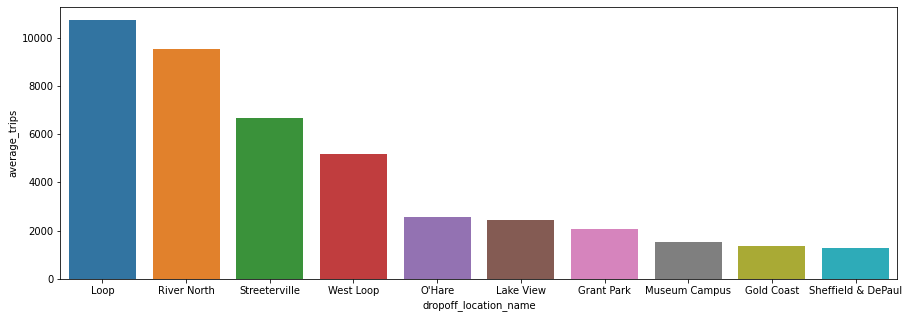

In [124]:
# Membuat barplot untuk 10 wilayah teratas yang dijadikan titik pengantaran
plt.figure(figsize=(15, 5))
sns.barplot(x ='dropoff_location_name', y = 'average_trips', data = top_destination)

**Summary:**
- 10 Destinasi yang paling sering dituju oleh penumpang yang menggunakan jasa taksi:
   1. Loop 
   2. River North
   3. Streeterville
   4. West Loop
   5. O'Hare
   6. Lake View	
   7. Grant Park
   8. Museum Campus	
   9. Gold Coast
   10. Sheffield & DePaul

### Jumlah Perjalanan tiap Perusahaan Taksi <a id='trip_per_company'></a>

In [125]:
# Mengurutkan df_4 berdasarkan average_trips
trips_per_comp = df_1.sort_values(by = 'trips_amount',  ascending = False)
trips_per_comp.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

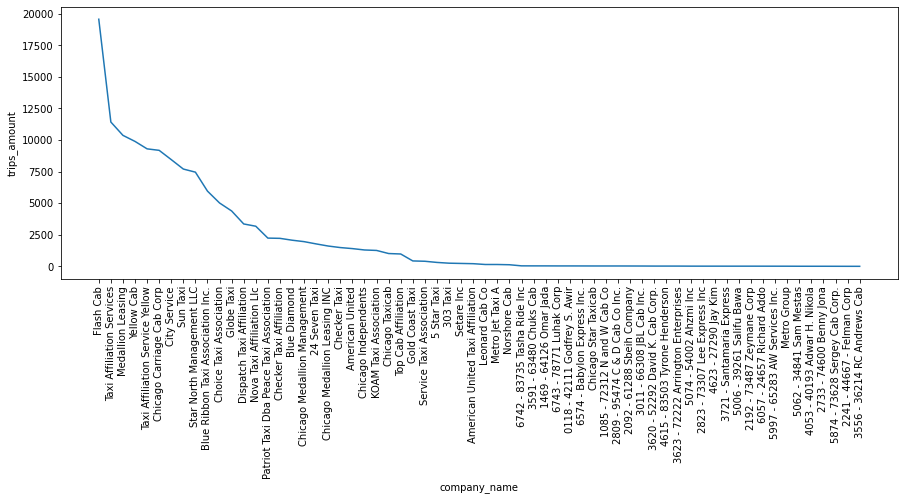

In [126]:
# Membuat lineplot melihat distribusi
plt.figure(figsize=(15, 5))
sns.lineplot(x ='company_name', y = 'trips_amount', data = trips_per_comp)
plt.xticks(rotation=90)

In [107]:
# Membuat fungsi untuk membuat nilai unik lebih sedikit
def changes_value(name):
    if name in ('Flash Cab', 'Taxi Affiliation Services	', 'Medallion Leasing', 'Yellow Cab', 
                'Taxi Affiliation Service Yellow', 'Chicago Carriage Cab Corp', 'City Service',
                'Sun Taxi', 'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.'):
        return name
    else:
        return 'Other Companies'

In [108]:
# Menerapkan fungsi untuk membuat nilai unik lebih sedikit
trips_per_comp['company_grouping'] = trips_per_comp['company_name'].apply(changes_value)
trips_per_comp = trips_per_comp.groupby(by = 'company_grouping').sum().sort_values(by = 'trips_amount',  
                                                                                   ascending = False).reset_index()
trips_per_comp

,company_grouping,trips_amount
0,Other Companies,49461
1,Flash Cab,19558
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Other Companies'),
  Text(1, 0, 'Flash Cab'),
  Text(2, 0, 'Medallion Leasing'),
  Text(3, 0, 'Yellow Cab'),
  Text(4, 0, 'Taxi Affiliation Service Yellow'),
  Text(5, 0, 'Chicago Carriage Cab Corp'),
  Text(6, 0, 'City Service'),
  Text(7, 0, 'Sun Taxi'),
  Text(8, 0, 'Star North Management LLC'),
  Text(9, 0, 'Blue Ribbon Taxi Association Inc.')])

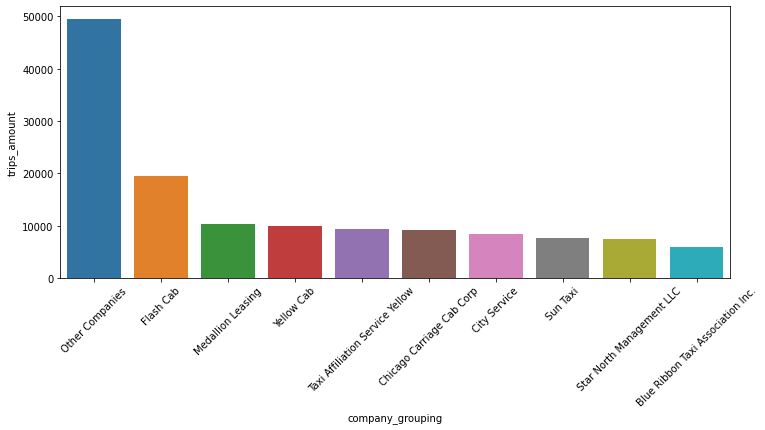

In [109]:
# Membuat barplot untuk 10 wilayah teratas yang dijadikan titik pengantaran
plt.figure(figsize=(12, 5))
sns.barplot(x ='company_grouping', y = 'trips_amount', data = trips_per_comp)
plt.xticks(rotation=45)

In [110]:
# Top 10 trips amount
top_10_comp = df_1.sort_values(by = 'trips_amount',  ascending = False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Flash Cab'),
  Text(1, 0, 'Taxi Affiliation Services'),
  Text(2, 0, 'Medallion Leasing'),
  Text(3, 0, 'Yellow Cab'),
  Text(4, 0, 'Taxi Affiliation Service Yellow'),
  Text(5, 0, 'Chicago Carriage Cab Corp'),
  Text(6, 0, 'City Service'),
  Text(7, 0, 'Sun Taxi'),
  Text(8, 0, 'Star North Management LLC'),
  Text(9, 0, 'Blue Ribbon Taxi Association Inc.')])

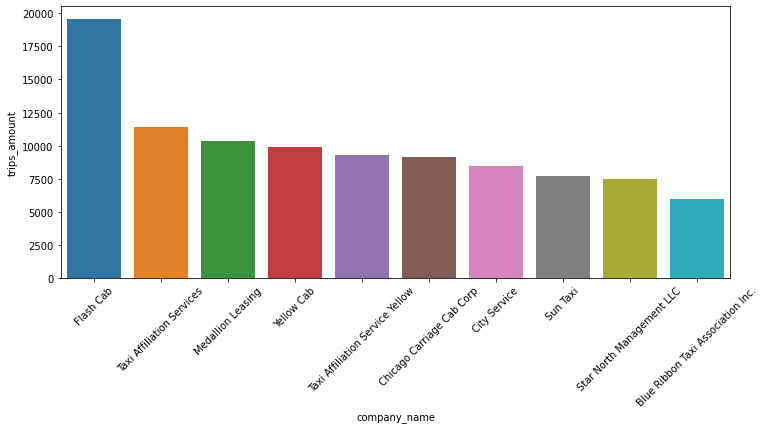

In [111]:
# Membuat barplot untuk 10 wilayah teratas yang dijadikan titik pengantaran
plt.figure(figsize=(12, 5))
sns.barplot(x ='company_name', y = 'trips_amount', data = top_10_comp)
plt.xticks(rotation=45)

**Summary:**
- 10 Perusahaan yang memiliki jumlah trip terbanyak adalah sebagai berikut:
   1. Flash Cab
   2. Taxi Affiliation Services
   3. Medallion Leasing
   4. Yellow Cab
   5. Taxi Affiliation Service Yellow
   6. Chicago Carriage Cab Corp
   7. City Service
   8. Sun Taxi
   9. Star North Management LLC
   10. Blue Ribbon Taxi Association Inc.
- Perusahaan Flash Cab memiliki total pelanggan terbanyak yang dimana perbedaannya cukup signifikan dibandingkan dengan perusahaan lainnya

## Menguji Hipotesis <a id='hypotesis_testing'></a>

Hipotesis nol umumnya adalah hipotesis yang menyatakan sesuatu yang akan diuji adalah sama, sehingga nilai 

H0: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **sama** pada hari-hari Sabtu yang hujan

H1: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **tidak sama** pada hari-hari Sabtu yang hujan

Kriteria pengujian hipoetesis yang saya gunakan adalah pengujian rata-rata untuk 2 populasi karena samplenya merupakan 2 populasi yang berbeda 

In [133]:
# Memfilter data
rain = df_7.query('weather_conditions == "Bad"')['duration_seconds'].reset_index()
sunny = df_7.query('weather_conditions == "Good"')['duration_seconds'].reset_index()

In [146]:
# Melihat karaterisik kolom duratio_seconds saat cuaca buruk
rain.duration_seconds.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [147]:
# Melihat karaterisik kolom duratio_seconds saat cuaca buruk
sunny.duration_seconds.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [136]:
# Melakukan Pengujian Levene Test
alpha = 0.05

levene_test_1 = st.levene(rain['duration_seconds'], sunny['duration_seconds']) 

print('l-value:', levene_test_1.pvalue)

if (levene_test_1.pvalue < alpha):
    print("Nilai Variance Berbeda")
else:
    print("Nilai Variance Sama")

l-value: 0.5332038671974493
Nilai Variance Sama


In [137]:
# Melakukan pengujian hipotesis
alpha = 0.05

results_usr = st.ttest_ind(rain['duration_seconds'], sunny['duration_seconds'], equal_var = True)

print('p-value:', results_usr.pvalue)

if (results_usr.pvalue < alpha):
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value: 6.517970327099473e-12
Kita menolak hipotesis nol


## Kesimpulan <a id='summary'></a>

**Berdasarkan analisis yang dilakukan berikut bebrapa kesimpulan yang didapatkan:**
- 10 Destinasi yang paling sering dituju oleh penumpang yang menggunakan jasa taksi:
   Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast,  Sheffield & DePaul
- Rata-rata trip untuk seluruh perusahaan adalah 2145
- 10 Perusahaan yang memiliki jumlah trip terbanyak adalah sebagai berikut:
   Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC,  Blue Ribbon Taxi Association Inc.
- Perusahaan Flash Cab memiliki total pelanggan terbanyak yang dimana perbedaannya cukup signifikan dibandingkan dengan perusahaan lainnya
- Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan
- Pada saat hujan dihari sabtu rata-rata durasi perjalanan lebih lama dengan nilai 2427 detik dibandingkan saat cuaca cerah dengan nilai 1999 

**Based on the analysis, the marketing team can consider the following recommendations:**
1.	To increase customer satisfaction, focus on providing rides to the top destinations visited by taxi passengers.
2.	Consider implementing surge pricing during rainy Saturdays to reflect the longer trip duration and encourage drivers to continue offering rides during these conditions.
3.	Use weather data to forecast potential changes in demand and adjust driver availability accordingly.
